### Contour removal if more than one contour predicted based on the center of LV

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pylab
import skimage
from skimage import measure,feature
import math
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [35]:
def fourD_add(arr):
    t=arr
    found_dic={}
    #print(t.shape[0])
    count=0
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0

    for t_im1 in arr:
         
        t_im1 = t_im1[:, :, 0] 
        icount += 1
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        #if icount==20:
         #   break
        found = []

        if len(cntrs)>1:
            #print('# of contours identified:::'+str(len(cntrs)), icount)
            print('count',count)
            plt.subplot(121),plt.imshow(t_im1,)
            for i in range(len(cntrs)):
                #print(type(cntrs[i]),cntrs[i].shape)
                #print ('cntrs',cntrs[i])
                polygon = Polygon(cntrs[i])  
                if polygon.contains(point):
                    found_dic[i]=1
                #found=list(found_dic.keys())    
                else:
                    found.append(i)
            #rint(found_dic.keys)     
            #rint('list',found)
            if len(found_dic)==0:
                print('in 47...')
                #found_dic={}
                found=[]
                for i1 in range(len(cntrs)):                    
                #the point was not present in any contour; hence find nearest
                    polygon = Polygon(cntrs[i1])
                    found_dic[i1]=polygon.distance(point)
                del found_dic[min(found_dic, key=found_dic.get)]
                found=list(found_dic.keys())
                #print('found',found)
                #print('found_dic',found_dic)
        for j in found:
            dict_shape[j]=cntrs[j].shape[0]
            for k in dict_shape:
               #print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0
               plt.subplot(122),plt.imshow(t_im1,)  
        count=count+1    
        plt.show()

449.0
xy 98 88
449.0
count 3
in 47...


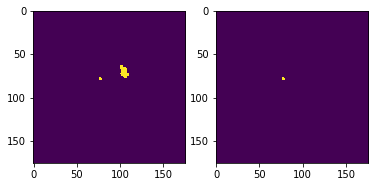

count 38


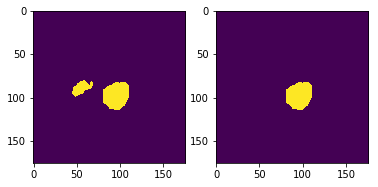

count 41


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


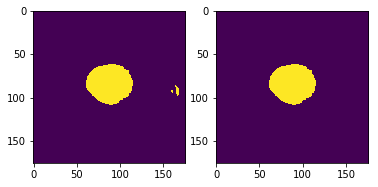

count 70


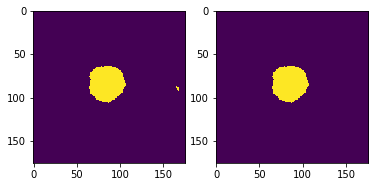

count 71


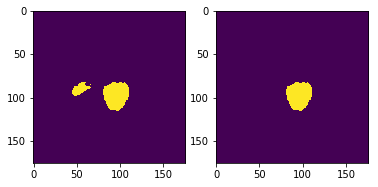

count 102


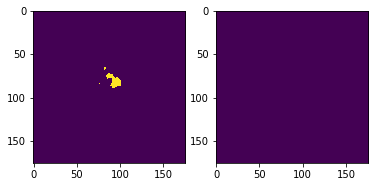

count 122


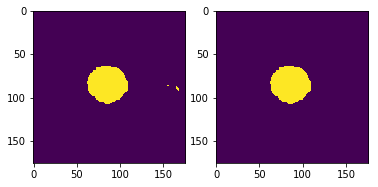

count 123


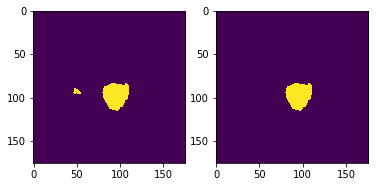

count 152


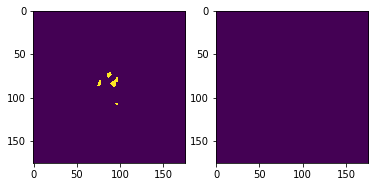

count 185


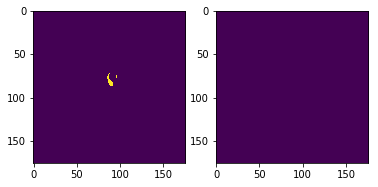

count 213


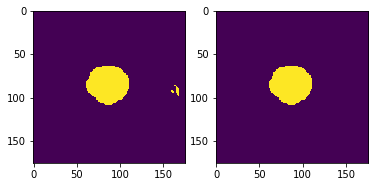

count 286


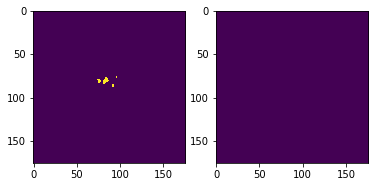

count 287


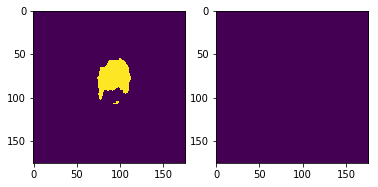

count 318


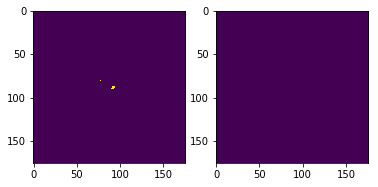

count 354


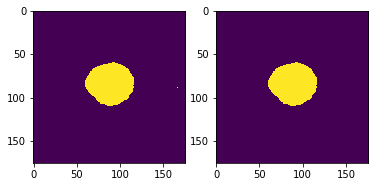

count 446


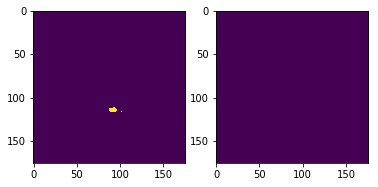

count 452


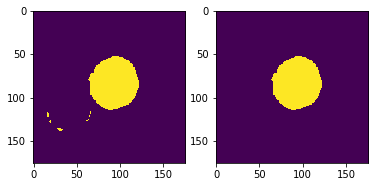

count 474


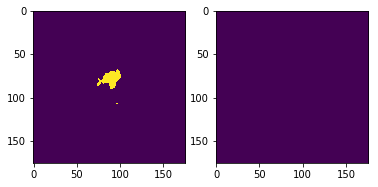

In [37]:
fourD_add(im)

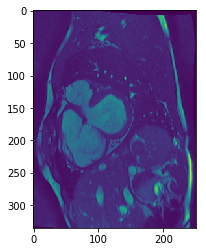

In [292]:
actual_image='/masvol/output/dsb/norm/1/3/validate/506/sax_60_IM-0256-0001.dcm.npy'
plt.imshow(np.load(actual_image))

In [123]:
total_image=im.shape[0]
print('Total labels:::'+str(total_image))

#Looping through all the labels and identifying ones with more than one contour
dict_contour_count={}
for i in range(total_image):
    result = im[i][:, :, 0]
    contours = measure.find_contours(result, 0.1)
    contours_created = skimage.measure.find_contours(result, 0.1)
    dict_contour_count[i]=len(contours_created)

Total labels:::450


In [125]:
images_with_more= ([i for i in dict_contour_count if dict_contour_count[i] > 1])
print('#of labels with more than 1 contour:::'+str(len(images_with_more)))

#of labels with more than 1 contour:::6


In [126]:
#trying to see if something has more than 3 contours
print([i for i in dict_contour_count if dict_contour_count[i] > 2])

[8]


In [10]:
#Verifying the images with more than 1 contour
for i in images_with_more:
    print(i)
    result = im[i][:, :, 0]
    pylab.imshow(result)
    #pylab.show()


NameError: name 'images_with_more' is not defined

In [130]:
def clean_contours(image):
    plt.figure(figsize=(10,10))    
    plt.subplot(221),plt.imshow(image,)
    plt.title('orig Image')
    plt.subplot(222),plt.imshow(feature.canny(image))
    plt.title('orig contour edges')
    dict_shape={}
    t_im1=image
    cntrs=skimage.measure.find_contours(t_im1,0.1)
    print('# of contours identified:::'+str(len(cntrs)))
    for i in range(len(cntrs)):
        print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
        dict_shape[i]=cntrs[i].shape[0]
    print(dict_shape)
    del dict_shape[max(dict_shape, key=dict_shape.get)]
    print(dict_shape)
    for k in dict_shape:
        print ('deleting contour '+str(k))
        x1=math.trunc(np.min(cntrs[k],axis=0)[0])
        y1=math.trunc(np.min(cntrs[k],axis=0)[1])
        print(x1)
        print(y1)
        x2=math.trunc(np.max(cntrs[k],axis=0)[0])
        y2=math.trunc(np.max(cntrs[k],axis=0)[1])
        print(x2)
        print(y2)
        t_im1[x1:x2+1, y1:y2+1]=0
        
    plt.subplot(223),plt.imshow(t_im1)
    plt.title('Fixed Image')
    plt.subplot(224),plt.imshow(feature.canny(t_im1))
    plt.title('Fixed contour edges')    
        

In [18]:
def clean_contours1(image):
    dict_shape={}
    t_im1=image
    cntrs=skimage.measure.find_contours(t_im1,0.1)
    #print('# of contours identified:::'+str(len(cntrs)))
    for i in range(len(cntrs)):
        #print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
        dict_shape[i]=cntrs[i].shape[0]
    #print(dict_shape)
    del dict_shape[max(dict_shape, key=dict_shape.get)]
    #print(dict_shape)
    for k in dict_shape:
        #print ('deleting contour '+str(k))
        x1=math.trunc(np.min(cntrs[k],axis=0)[0])
        y1=math.trunc(np.min(cntrs[k],axis=0)[1])
        x2=math.trunc(np.max(cntrs[k],axis=0)[0])
        y2=math.trunc(np.max(cntrs[k],axis=0)[1])
        t_im1[x1:x2+1, y1:y2+1]=0   

In [50]:
image_test=np.load('/masvol/output/dsb/norm/1/3/validate/540/sax_7_IM-11207-0013.dcm.npy')

In [51]:
image_test.shape

(440, 440)

In [52]:
image_test=image_test.reshape(1,image_test.shape[0],image_test.shape[1],1)
image_test.shape

(1, 440, 440, 1)

In [10]:
def clean_contours2(arr):
   #print(self.test_images.shape) 
    finalArray = np.zeros((arr.shape[0], arr.shape[1], arr.shape[2],arr.shape[3]))
    counter=-1
    for t_im1 in arr:
        counter=counter+1
        t_im1 = t_im1[:, :, 0]
        plt.subplot(121),plt.imshow(t_im1,)
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)
        print('# of contours identified:::'+str(len(cntrs)))
        if len(cntrs)>1:
            for i in range(len(cntrs)):
                dict_shape[i]=cntrs[i].shape[0]
            if  len(cntrs)>0:            
                del dict_shape[max(dict_shape, key=dict_shape.get)]
                #print(dict_shape)
            for k in dict_shape:
                print ('deleting contour '+str(k))
                x1=math.trunc(np.min(cntrs[k],axis=0)[0])
                y1=math.trunc(np.min(cntrs[k],axis=0)[1])
                x2=math.trunc(np.max(cntrs[k],axis=0)[0])
                y2=math.trunc(np.max(cntrs[k],axis=0)[1])
                t_im1[x1:x2+1, y1:y2+1]=0   
            plt.subplot(122),plt.imshow(t_im1,)
            #print(np.max(t_im1))    
            t_im2=np.zeros((t_im1.shape[0],t_im1.shape[1],1))
            t_im2[:,:,0]=t_im1
            #print('im2',np.max(t_im2),t_im2.shape) 
            #print('counter',counter)
            finalArray[counter]=t_im2
            plt.show()

In [ ]:
    def clean_contours(arr):
        #print(self.test_images.shape)                     
        for t_im1  in arr:
            t_im1 = t_im1[:, :, 0]
            #print(t_im1.shape)
            dict_shape={}
            cntrs=skimage.measure.find_contours(t_im1,0.1)
            print('# of contours identified:::'+str(len(cntrs)))
            for i in range(len(cntrs)):
                dict_shape[i]=cntrs[i].shape[0]
            if  len(cntrs)>0:
                del dict_shape[max(dict_shape, key=dict_shape.get)]
            #print(dict_shape)
            for k in dict_shape:
               print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0  

In [148]:
def fourD_add1(arr):
    t=arr
    found_dic={}
    count=0
    #print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0

    for t_im1 in arr:
        found_dic={} 
        t_im1 = t_im1[:, :, 0]        
        icount += 1
        #print('count',count)
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        #if icount==105:
         #   break
        found = []
        #print('ctrs count',len(cntrs))
        if len(cntrs)>1:
            #print('# of contours identified:::'+str(len(cntrs)), icount)
            plt.subplot(121),plt.imshow(t_im1,)
            for i in range(len(cntrs)):
                #print(type(cntrs[i]),cntrs[i].shape)
                #print ('cntrs',cntrs[i])
                polygon = Polygon(cntrs[i])  
                if polygon.contains(point):
                    found_dic[i]=1
                    #print('point exists')
                    #found=list(found_dic.keys())    
                else:
                    found.append(i)
                    #print('no point found')
            if len(found_dic)==0:
                found=[]
                print ('No contour has the point')
                for i1 in range(len(cntrs)):  
                    #print (i1)
                    found_dic[i1]=cntrs[i1].shape[0]
                    #print('found dic',len(found_dic))
                if  len(found_dic)>1:
                    del found_dic[max(found_dic, key=found_dic.get)]
                #print(dict_shape)
                found=list(found_dic.keys())
                #print('found',found)
                #print('found',found)
                #print('found_dic',found_dic)
        count=count+1         
        for j in found:
            #print(j)
            dict_shape[j]=cntrs[j].shape[0]
            for k in dict_shape:
               #print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0
               plt.subplot(122),plt.imshow(t_im1,)  
        plt.show()
        

In [141]:
image='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_bce_predict/dsb_1_176_pred_round.npy'
im=np.load(image)
im.shape

(480, 176, 176, 1)

In [89]:
def fourD_add1lookback(arr):
    t=arr
    found_dic={}
    #print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0

    for t_im1 in arr:
         
        t_im1 = t_im1[:, :, 0]        
        icount += 1
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        #if icount==20:
         #   break
        found = []


        #print('# of contours identified:::'+str(len(cntrs)), icount)
        plt.subplot(121),plt.imshow(t_im1,)
        for i in range(len(cntrs)):
            #print(type(cntrs[i]),cntrs[i].shape)
            #print ('cntrs',cntrs[i])
            polygon = Polygon(cntrs[i])  
            if polygon.contains(point):
                found_dic[i]=1
            #found=list(found_dic.keys())    
            else:
                found.append(i)
        #rint(found_dic.keys)     
        #rint('list',found)
        """if len(found_dic)==0:
            for i1 in range(len(cntrs)):  
                found_dic[i1]=cntrs[i1].shape[0]
                if  len(cntrs)>0:
                    del found_dic[max(found_dic, key=found_dic.get)]
            #print(dict_shape)
            found=list(found_dic.keys())
            #print('found',found)
            #print('found_dic',found_dic)"""
        for j in found:
            #print(j)
            dict_shape[j]=cntrs[j].shape[0]
            for k in dict_shape:
               #print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0
               plt.subplot(122),plt.imshow(t_im1,)  
        plt.show()

In [4]:
image='/masvol/output/dsb/norm/1/3/unet_model_train/combined_1_3_0_176_CLAHE_augx_bce1_crERDS2_predict/dsb_343_176_predictions.npy'
im=np.load(image)
im.shape

(330, 176, 176, 1)

In [8]:
pred_round_path='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_CLAHE_augx_bce1_crNCR_predict/dsb_508_176_pred_round.npy'
prediction_path='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_CLAHE_augx_bce1_crNCR_predict/dsb_508_176_NCR_predictions_cleaned.npy'
image_path='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_bce_predict/dsb_508_176_ts_norm.npy'
im_clean=im

In [9]:
ts=np.load(image_path)
predictions=np.load(prediction_path)
samples, x, y, z = predictions.shape
pred_round=np.load(pred_round_path)
print(x,y)

176 176


In [ ]:
l=0
for i in range(im.shape[0]):
    #print(image_array[i])
    #print(ones)
    #f, axs = plt.subplots(1,3,figsize=(15,15))
    #plt.subplot(141),plt.imshow(ts[i].reshape(x, y))
    #plt.title('test image {0} size:{1}'.format(image_array[i],ones))
    #plt.xticks([]), plt.yticks([])
    
    #plt.subplot(142),plt.imshow(predictions[i].reshape(x, y))
    #plt.title('prediction'), plt.xticks([]), plt.yticks([])
    #plt.subplot(143),plt.imshow(pred_round[i].reshape(x, y))
    #plt.subplot(154),plt.imshow(im[i].reshape(x, y))
    #plt.title('prediction_clean'), plt.xticks([]), plt.yticks([])
    #plt.subplot(144),plt.imshow(ts[i].reshape(x, y)), 
    #plt.imshow(predictions[i].reshape(x, y), 'binary', interpolation='none', alpha=0.3)
    #plt.title('overlay'), plt.xticks([]), plt.yticks([])
    #plt.show()
    #print(l)
    l+=1
    

In [61]:
def fourD_add1R(arr):
    t=arr
    found_dic={}
    count=0
    #print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0
    n=0
    for t_im1 in arr:
        found_dic={} 
        t_im1 = t_im1[:, :, 0]        
        icount += 1
        #print('count',count)
        #print(t_im1.shape)
        dict_shape={}
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        #if icount==105:
         #   break
        found = []
        #print('ctrs count',len(cntrs))
        if len(cntrs)>1:
            #print('# of contours identified:::'+str(len(cntrs)), icount)
            #plt.subplot(121),plt.imshow(t_im1,)
            try:

                for i in range(len(cntrs)):
                    #print(type(cntrs[i]),cntrs[i].shape)
                    #print ('cntrs',cntrs[i])
                    polygon = Polygon(cntrs[i])  
                    if polygon.contains(point):
                        found_dic[i]=1
                    #found=list(found_dic.keys())    
                    else:
                        found.append(i)  
                if len(found_dic)==0:
                    n=n+1
            except ValueError:            
                print(len(cntrs[i]),cntrs[i]) 
        count=count+1         
        for j in found:
            #print(j)
            dict_shape[j]=cntrs[j].shape[0]
            for k in dict_shape:
               #print ('deleting contour '+str(k))
               x1=math.trunc(np.min(cntrs[k],axis=0)[0])
               y1=math.trunc(np.min(cntrs[k],axis=0)[1])
               x2=math.trunc(np.max(cntrs[k],axis=0)[0])
               y2=math.trunc(np.max(cntrs[k],axis=0)[1])
               t_im1[x1:x2+1, y1:y2+1]=0
               #plt.subplot(122),plt.imshow(t_im1,)  
        #plt.show()
    print('n',n)

In [73]:
image='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_bce_predict/dsb_508_176_pred_round.npy'
im=np.load(image)
im.shape

(270, 176, 176, 1)

In [66]:
image='/masvol/output/dsb/norm/1/3/unet_model_train/combined_1_3_0_176_CLAHE_augx_bce1_crERDS2_predict/dsb_343_176_predictions.npy'
im=np.load(image)
im.shape

(330, 176, 176, 1)

In [72]:
fourD_add1R(im)

177.0
xy 57 88
177.0
n 28


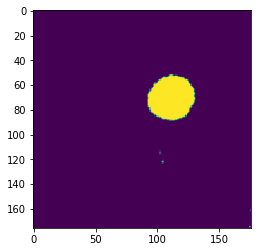

In [33]:
plt.imshow(im[11,:,:,0])
im_t=im[11,:,:,0]

In [45]:
my_ctrs=skimage.measure.find_contours(im_t,0.1) 
for i in range(len(my_ctrs)):
    print(i, len(my_ctrs[i]),my_ctrs[i].shape)


0 163 (163, 2)
1 5 (5, 2)
2 13 (13, 2)
3 3 (3, 2)
4 4 (4, 2)
5 2 (2, 2)


In [46]:
print(my_ctrs[5])

[[174.73777732 175.        ]
 [175.         174.16103793]]


In [104]:
import operator

In [199]:

def remove_ctrs(arr):
    t=arr
    found_dic={}
    count=0
    #print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0
    n=0
    for t_im1 in arr:
        found_dic={} 
        t_im1 = t_im1[:, :, 0]        
        icount += 1
        #print('count',count)
        #print(t_im1.shape)
        dict_shape={}
        remove_dict={}
        sorted_keys=[]
        fill_found=[]
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        for i in range(len(cntrs)):
            #print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
            dict_shape[i]=cntrs[i].shape[0]  
        sorted_keys = sorted(dict_shape, key=dict_shape.get,reverse=True) 

        print('dict_shape',dict_shape)
        print('sorted_keys',sorted_keys)
        #if icount==15:
            #break
        found = []
        in_loop=0
        #print('ctrs count',len(cntrs))
        if len(cntrs)>1:
            #print('# of contours identified:::'+str(len(cntrs)), icount)
            plt.subplot(121),plt.imshow(t_im1,)
            try:

                for i in sorted_keys:
                    #print(type(cntrs[i]),cntrs[i].shape)
                    #print ('cntrs',cntrs[i])
                    in_loop+=1
                    if len(found_dic)==0:
                        polygon = Polygon(cntrs[i])  
                        if polygon.contains(point):
                            found_dic[i]=1
                            for j in range(in_loop,len(sorted_keys)):
                                polygon1 = Polygon(cntrs[sorted_keys[j]]) 
                                if polygon.contains(polygon1):
                                    print('Yes the polygon contains sub polygon')
                                    fill_found.append(sorted_keys[j])
                                else:
                                    found.append(sorted_keys[j])
                            print('Found after polygon contain',found)        
                        #found=list(found_dic.keys())   

                        else:
                            found.append(i)  
                            print('Since polygon did not contain, found is ',found)
                    else:
                        continue 
                        print('since already found a contour, found is', found)
            except ValueError:            
                print(len(cntrs[i]),cntrs[i]) 
        count=count+1    
        print('found',found)
        remove_dict={}

        for k in fill_found:
            print(k)
            print ('filling contour '+str(k))
            x1=math.trunc(np.min(cntrs[k],axis=0)[0])
            y1=math.trunc(np.min(cntrs[k],axis=0)[1])
            x2=math.trunc(np.max(cntrs[k],axis=0)[0])
            y2=math.trunc(np.max(cntrs[k],axis=0)[1])
            t_im1[x1:x2+1, y1:y2+1]=1   
        for k in found:
            print(k)
            print ('deleting contour '+str(k))
            x1=math.trunc(np.min(cntrs[k],axis=0)[0])
            y1=math.trunc(np.min(cntrs[k],axis=0)[1])
            x2=math.trunc(np.max(cntrs[k],axis=0)[0])
            y2=math.trunc(np.max(cntrs[k],axis=0)[1])
            t_im1[x1:x2+1, y1:y2+1]=0
        
        plt.subplot(122),plt.imshow(t_im1,)  
        plt.show()
    print('n',n)

In [200]:
image='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_bce_predict/dsb_508_176_pred_round.npy'
im=np.load(image)
im.shape

(270, 176, 176, 1)

In [205]:
def remove_ctrsAll(arr):
    t=arr
    found_dic={}
    count=0
    #print(t.shape[0])
    x=0
    for i in range(t.shape[0]):
        #print(np.max(t[i,:,:,0]))
        x=x+t[i,:,:,0]
    print(np.max(x))
    tgt=np.where(x==np.max(x))
    #print('tgt',tgt)
    x1=max(tgt[0])
    y1=max(tgt[1])
    print('xy',x1,y1)
    point = Point(x1, y1)    
    print(x[x1,y1])
    icount = 0
    n=0
    for t_im1 in arr:
        found_dic={} 
        t_im1 = t_im1[:, :, 0]        
        icount += 1
        #print('count',count)
        #print(t_im1.shape)
        dict_shape={}
        remove_dict={}
        sorted_keys=[]
        fill_found=[]
        cntrs=skimage.measure.find_contours(t_im1,0.1)  
        for i in range(len(cntrs)):
            #print ('contour:'+str(i)+'  shape[0]:'+str(cntrs[i].shape[0]))
            dict_shape[i]=cntrs[i].shape[0]  
        sorted_keys = sorted(dict_shape, key=dict_shape.get,reverse=True) 

        #print('dict_shape',dict_shape)
        #print('sorted_keys',sorted_keys)
        #if icount==15:
            #break
        found = []
        in_loop=0
        #print('ctrs count',len(cntrs))
        #if len(cntrs)>1:
            #print('# of contours identified:::'+str(len(cntrs)), icount)
        #plt.subplot(121),plt.imshow(t_im1,)
        try:

            for i in sorted_keys:
                #print(type(cntrs[i]),cntrs[i].shape)
                #print ('cntrs',cntrs[i])
                in_loop+=1
                if len(found_dic)==0:
                    polygon = Polygon(cntrs[i])  
                    if polygon.contains(point):
                        found_dic[i]=1
                        for j in range(in_loop,len(sorted_keys)):
                            polygon1 = Polygon(cntrs[sorted_keys[j]]) 
                            if polygon.contains(polygon1):
                                print('Yes the polygon contains sub polygon')
                                fill_found.append(sorted_keys[j])
                            else:
                                found.append(sorted_keys[j])
                        print('Found after polygon contain',found)        
                    #found=list(found_dic.keys())   

                    else:
                        found.append(i)  
                        print('Since polygon did not contain, found is ',found)
                else:
                    continue 
                    print('since already found a contour, found is', found)
        except ValueError:            
            print(len(cntrs[i]),cntrs[i]) 
        count=count+1    
        print('found',found)
        remove_dict={}

        for k in fill_found:
            print(k)
            print ('filling contour '+str(k))
            x1=math.trunc(np.min(cntrs[k],axis=0)[0])
            y1=math.trunc(np.min(cntrs[k],axis=0)[1])
            x2=math.trunc(np.max(cntrs[k],axis=0)[0])
            y2=math.trunc(np.max(cntrs[k],axis=0)[1])
            t_im1[x1:x2+1, y1:y2+1]=1   
        for k in found:
            print(k)
            print ('deleting contour '+str(k))
            x1=math.trunc(np.min(cntrs[k],axis=0)[0])
            y1=math.trunc(np.min(cntrs[k],axis=0)[1])
            x2=math.trunc(np.max(cntrs[k],axis=0)[0])
            y2=math.trunc(np.max(cntrs[k],axis=0)[1])
            t_im1[x1:x2+1, y1:y2+1]=0
        
        plt.subplot(122),plt.imshow(t_im1,)  
        #plt.show()
    #print('n',n)

In [211]:
image='/masvol/output/dsb/norm/1/3/unet_model_validate/combined_1_3_0_176_aug_bce_predict/dsb_506_176_pred_round.npy'
im=np.load(image)
im.shape

(450, 176, 176, 1)